<a href="https://colab.research.google.com/github/Debvaz2024/Proyecto-integrador-bootcamp/blob/main/Proyecto_Integrador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROYECTO INTEGRADOR
## SQL + Python: Proyecto Datos Mundiales

#### Integrantes del equipo:
- Gómez Lucas
- Rey Gonzalo
- Vázquez Débora

#### Carga de bibliotecas

In [ ]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
from mysql.connector import Error

In [ ]:
def obtener_datos_sql(query):
    try:
        conexion = mysql.connector.connect(host="localhost", user="USER", password="PASSWORD",database= "proyecto_integrador")

        if conexion.is_connected():
            print("Conexión exitosa a la base de datos")

            cursor = conexion.cursor()

            cursor.execute(query)

            columnas = [i[0] for i in cursor.description]

            resultados = cursor.fetchall()

            df = pd.DataFrame(resultados, columns=columnas)
            return df

    except Error as e:
        print(f"Ocurrió un error: {e}")
        return None

    finally:
        if conexion.is_connected():
            cursor.close()
            conexion.close()
            print("Conexión cerrada")

In [ ]:
def actualizar_datos_sql(update):
    try:
        conexion = mysql.connector.connect(host="localhost", user="USER", password="PASSWORD",database= "proyecto_integrador")

        if conexion.is_connected():
            print("Conexión exitosa a la base de datos")

            cursor = conexion.cursor()

            cursor.execute(update)

            conexion.commit()
            print("Datos actualizados")
    except Error as e:
        print(f"Ocurrió un error: {e}")
        return None

    finally:
        if conexion.is_connected():
            cursor.close()
            conexion.close()
            print("Conexión cerrada")

#### Consultas

##### Ejercicio 1: Escribe una consulta para mostrar el nombre y la población de todos los países del continente europeo.

In [ ]:
consulta_sql1 = "SELECT Name as Pais, population as Poblacion FROM proyecto_integrador.country WHERE continent = 'Europe';"

data_frame1 = obtener_datos_sql(consulta_sql1)
if data_frame1 is not None:
    print(data_frame1)

Conexión exitosa a la base de datos
Conexión cerrada
                             Pais  Poblacion
0                         Albania    3401200
1                         Andorra      78000
2                         Austria    8091800
3                         Belgium   10239000
4                        Bulgaria    8190900
5          Bosnia and Herzegovina    3972000
6                         Belarus   10236000
7                     Switzerland    7160400
8                  Czech Republic   10278100
9                         Germany   82164700
10                        Denmark    5330000
11                          Spain   39441700
12                        Estonia    1439200
13                        Finland    5171300
14                         France   59225700
15                  Faroe Islands      43000
16                 United Kingdom   59623400
17                      Gibraltar      25000
18                         Greece   10545700
19                        Croatia    4473000
20

In [ ]:
data_frame1_Top10 = data_frame1.nlargest(10, 'Poblacion')

In [ ]:
data_frame1_Top10 = data_frame1_Top10.sort_values(by='Poblacion', ascending=True)

In [ ]:
data_frame1_Top10['Poblacion_millones'] = data_frame1_Top10['Poblacion']/1000000

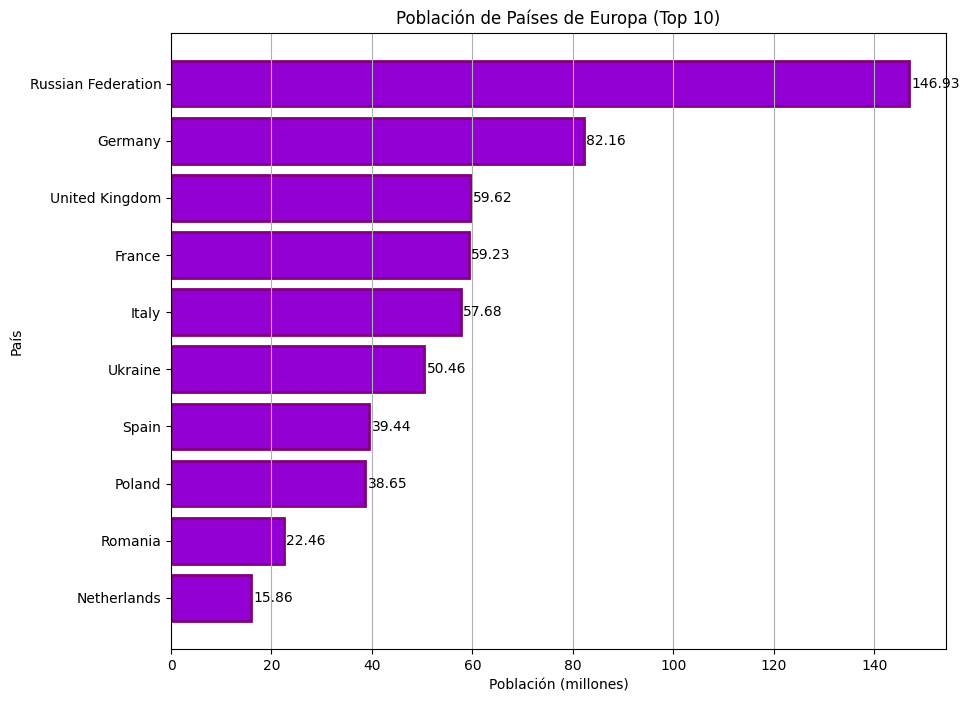

In [ ]:
plt.figure(figsize=(10, 8))
barras = plt.barh(data_frame1_Top10['Pais'], data_frame1_Top10['Poblacion_millones'], color='darkviolet', edgecolor = "purple", linewidth = 2)
plt.title('Población de Países de Europa (Top 10)')
plt.xlabel('Población (millones)')
plt.ylabel('País')

# generamos las etiquetas en las barras con un bucle
for b in barras:
    xval = b.get_width()
    plt.text(xval+0.5, b.get_y() + b.get_height()/2, f"{xval:.2f}", ha='left', va='center')

plt.grid(axis='x')
plt.show()

##### Ejercicio 2: Escribe una consulta para mostrar los nombres y las áreas de superficie de los cinco países más grandes del mundo (en términos de área de superficie).

In [ ]:
consulta_sql2 = "SELECT Name as Pais, SurfaceArea as Superficie_km2 FROM country ORDER BY SurfaceArea desc limit 5;"

data_frame2 = obtener_datos_sql(consulta_sql2)
if data_frame2 is not None:
    print(data_frame2)

Conexión exitosa a la base de datos
Conexión cerrada
                 Pais Superficie_km2
0  Russian Federation    17075400.00
1          Antarctica    13120000.00
2              Canada     9970610.00
3               China     9572900.00
4       United States     9363520.00


In [ ]:
data_frame2['Superficie_millones_km2'] = data_frame2['Superficie_km2']/1000000

In [ ]:
data_frame2 = data_frame2.sort_values(by='Superficie_millones_km2', ascending=True)

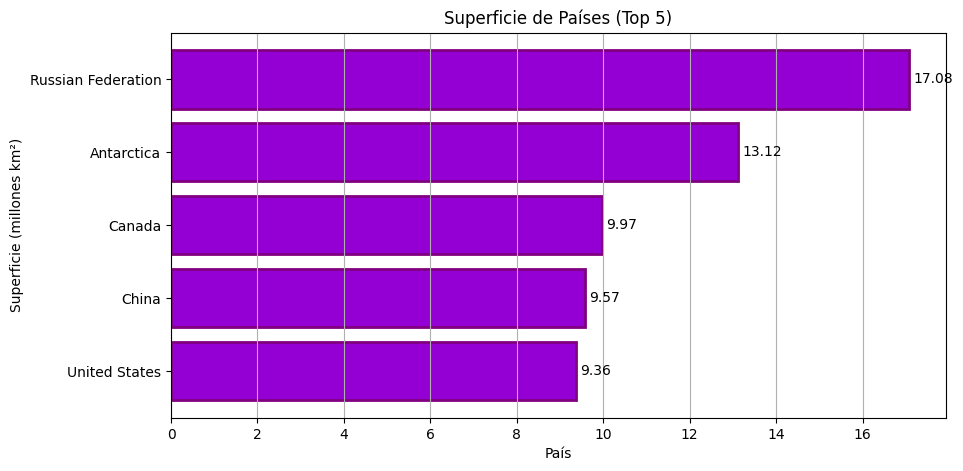

In [ ]:
plt.figure(figsize=(10, 5))
barras = plt.barh(data_frame2['Pais'], data_frame2['Superficie_millones_km2'], color='darkviolet', edgecolor="purple", linewidth=2)
plt.title('Superficie de Países (Top 5)')
plt.xlabel('País')
plt.ylabel('Superficie (millones km²)')

# generamos las etiquetas en las barras con un bucle
for b in barras:
    xval = b.get_width()
    plt.text(xval +0.1, b.get_y() + b.get_height()/2, f"{xval:.2f}", ha='left', va='center')

plt.grid(axis='x')
plt.show()

##### Ejercicio 3: Escribe una consulta para calcular la población total de todos los países de cada continente y mostrar el resultado junto con el nombre del continente.

In [ ]:
consulta_sql3 = "SELECT Continent as Continente,sum(population) as PoblacionTotal FROM country GROUP BY continent ORDER BY sum(population) DESC;"

data_frame3 = obtener_datos_sql(consulta_sql3)
if data_frame3 is not None:
    print(data_frame3)

Conexión exitosa a la base de datos
Conexión cerrada
      Continente PoblacionTotal
0           Asia     3927467700
1         Africa      784475000
2         Europe      730074600
3  North America      482993000
4  South America      345780000
5        Oceania       30401150
6     Antarctica              0


In [ ]:
data_frame3['PoblacionTotal_Millones'] = data_frame3['PoblacionTotal'] / 1000000

In [ ]:
data_frame3 = data_frame3.sort_values(by='PoblacionTotal', ascending=True)

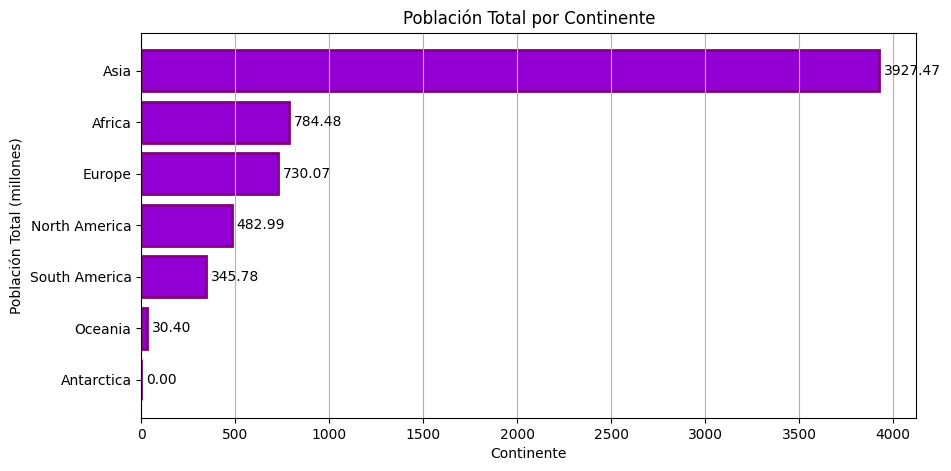

In [ ]:
plt.figure(figsize=(10, 5))
barras = plt.barh(data_frame3['Continente'], data_frame3['PoblacionTotal_Millones'], color='darkviolet', edgecolor = "purple", linewidth = 2)
plt.title('Población Total por Continente')
plt.xlabel('Continente')
plt.ylabel('Población Total (millones)')

# generamos las etiquetas en las barras con un bucle
for b in barras:
    xval = b.get_width()
    plt.text(xval + 25, b.get_y() + b.get_height()/2, f"{xval:.2f}", ha='left', va='center')

plt.grid(axis='x')
plt.show()

##### Ejercicio 4: Escribe una consulta para mostrar el nombre de las ciudades y la población de todos los países de Europa, ordenados por población de la ciudad de manera descendente.

In [ ]:
consulta_sql4 = "SELECT ci.name as Ciudad, ci.population as Poblacion, co.name as Pais FROM city as ci LEFT JOIN country as co ON ci.countrycode = co.code WHERE co.continent = 'Europe' ORDER BY ci.POPULATION desc"

data_frame4 = obtener_datos_sql(consulta_sql4)
if data_frame4 is not None:
    print(data_frame4)

Conexión exitosa a la base de datos
Conexión cerrada
                 Ciudad  Poblacion                           Pais
0                Moscow    8389200             Russian Federation
1                London    7285000                 United Kingdom
2         St Petersburg    4694000             Russian Federation
3                Berlin    3386667                        Germany
4                Madrid    2879052                          Spain
..                  ...        ...                            ...
836          Serravalle       4802                     San Marino
837          San Marino       2294                     San Marino
838        Longyearbyen       1438         Svalbard and Jan Mayen
839        Monaco-Ville       1234                         Monaco
840  Città del Vaticano        455  Holy See (Vatican City State)

[841 rows x 3 columns]


In [ ]:
data_frame4

,Ciudad,Poblacion,Pais
0,Moscow,8389200,Russian Federation
1,London,7285000,United Kingdom
2,St Petersburg,4694000,Russian Federation
3,Berlin,3386667,Germany
4,Madrid,2879052,Spain
...,...,...,...
836,Serravalle,4802,San Marino
837,San Marino,2294,San Marino
838,Longyearbyen,1438,Svalbard and Jan Mayen
839,Monaco-Ville,1234,Monaco


In [ ]:
consulta_sql4_top = "SELECT ci.name as Ciudad, ci.population as Poblacion, co.name as Pais FROM city as ci LEFT JOIN country as co ON ci.countrycode = co.code WHERE co.continent = 'Europe' ORDER BY ci.POPULATION desc LIMIT 20"

data_frame4_top = obtener_datos_sql(consulta_sql4_top)
if data_frame4_top is not None:
    print(data_frame4_top)

Conexión exitosa a la base de datos
Conexión cerrada
              Ciudad  Poblacion                Pais
0             Moscow    8389200  Russian Federation
1             London    7285000      United Kingdom
2      St Petersburg    4694000  Russian Federation
3             Berlin    3386667             Germany
4             Madrid    2879052               Spain
5               Roma    2643581               Italy
6               Kyiv    2624000             Ukraine
7              Paris    2125246              France
8          Bucuresti    2016131             Romania
9           Budapest    1811552             Hungary
10           Hamburg    1704735             Germany
11             Minsk    1674000             Belarus
12          Warszawa    1615369              Poland
13              Wien    1608144             Austria
14         Barcelona    1503451               Spain
15  Harkova [Harkiv]    1500000             Ukraine
16       Novosibirsk    1398800  Russian Federation
17    Nizni

In [ ]:
data_frame4_top['Poblacion_millones']=data_frame4_top['Poblacion']/1000000

In [ ]:
data_frame4_top = data_frame4_top.sort_values(by='Poblacion_millones', ascending=True)

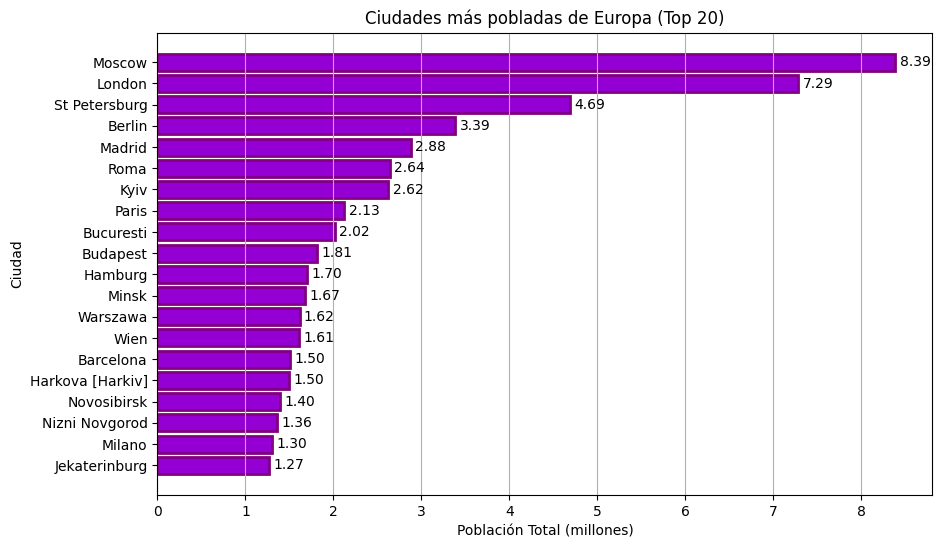

In [ ]:
plt.figure(figsize=(10, 6))
barras = plt.barh(data_frame4_top['Ciudad'], data_frame4_top['Poblacion_millones'], color='darkviolet', edgecolor="purple", linewidth=2)
plt.title('Ciudades más pobladas de Europa (Top 20)')
plt.xlabel('Población Total (millones)')
plt.ylabel('Ciudad')

# generamos las etiquetas en las barras con un bucle
for b in barras:
    xval = b.get_width()
    plt.text(xval + 0.05, b.get_y() + b.get_height()/2, f"{xval:.2f}", ha='left', va='center')

plt.grid(axis='x')
plt.show()

##### Ejercicio 5: Actualiza la población de China (código de país 'CHN') a 1500000000 (1.5 mil millones).

In [ ]:
consulta_sql5 = "SELECT name as Pais, code as CodigoPais, population as Poblacion FROM country WHERE code = 'CHN'"

data_frame5 = obtener_datos_sql(consulta_sql5)
if data_frame5 is not None:
    print(data_frame5)

Conexión exitosa a la base de datos
Conexión cerrada
    Pais CodigoPais   Poblacion
0  China        CHN  1500000000


In [ ]:
# (La población inicial de China era de '1277558000')

update = "UPDATE country SET population = 1500000000 WHERE code = 'CHN';"

actualizar_datos_sql(update)

data_frame5 = obtener_datos_sql(consulta_sql5)
if data_frame5 is not None:
    print(data_frame5)

Conexión exitosa a la base de datos
Datos actualizados
Conexión cerrada
Conexión exitosa a la base de datos
Conexión cerrada
    Pais CodigoPais   Poblacion
0  China        CHN  1500000000


#### Consultas adicionales

##### Ejercicio 6: Cantidad de hablantes por idioma en Europa.

In [ ]:
consulta_sql6 = "SELECT co.Name AS Pais, co.Continent AS Continente, cl.Language AS Idioma, cl.Percentage AS Porcentaje, ROUND(co.Population * (cl.Percentage / 100), 0) AS Hablantes_Por_Idioma FROM country co JOIN  countrylanguage cl ON co.Code = cl.CountryCode ORDER BY ROUND(co.Population * (cl.Percentage / 100), 0)  DESC;"

data_frame6 = obtener_datos_sql(consulta_sql6)
if data_frame6 is not None:
    print(data_frame6)

Conexión exitosa a la base de datos
Conexión cerrada
                                 Pais     Continente      Idioma Porcentaje  \
0                               China           Asia     Chinese       92.0   
1                               India           Asia       Hindi       39.9   
2                       United States  North America     English       86.2   
3                              Brazil  South America  Portuguese       97.5   
4                  Russian Federation         Europe     Russian       86.6   
..                                ...            ...         ...        ...   
979  Saint Vincent and the Grenadines  North America     English        0.0   
980           Virgin Islands, British  North America     English        0.0   
981                 Wallis and Futuna        Oceania      Futuna        0.0   
982                 Wallis and Futuna        Oceania      Wallis        0.0   
983                             Yemen           Asia     Soqutri        0.0   

In [ ]:
data_frame6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Pais                  984 non-null    object
 1   Continente            984 non-null    object
 2   Idioma                984 non-null    object
 3   Porcentaje            984 non-null    object
 4   Hablantes_Por_Idioma  984 non-null    object
dtypes: object(5)
memory usage: 38.6+ KB


In [ ]:
data_frame6['Hablantes_Por_Idioma'] = pd.to_numeric(data_frame6['Hablantes_Por_Idioma'])
data_frame6['Porcentaje'] = pd.to_numeric(data_frame6['Porcentaje'])

In [ ]:
data_frame6_mod = data_frame6[(data_frame6['Continente'] == 'Europe') &  (data_frame6['Porcentaje'] >0)]
print(data_frame6_mod)

                   Pais Continente      Idioma  Porcentaje  \
4    Russian Federation     Europe     Russian        86.6   
12              Germany     Europe      German        91.3   
18       United Kingdom     Europe     English        97.3   
19               France     Europe      French        93.6   
20                Italy     Europe     Italian        94.1   
..                  ...        ...         ...         ...   
895             Albania     Europe  Macedonian         0.1   
901              Monaco     Europe     English         6.5   
905           Gibraltar     Europe      Arabic         7.4   
914       Liechtenstein     Europe     Italian         2.5   
915       Liechtenstein     Europe     Turkish         2.5   

     Hablantes_Por_Idioma  
4             127244844.0  
12             75016371.0  
18             58013568.0  
19             55435255.0  
20             54276880.0  
..                    ...  
895                3401.0  
901                2210.0  
905

In [ ]:
consulta_sql_PT = "SELECT Name as Pais, Population as Poblacion FROM country WHERE Continent = 'Europe' ORDER BY Population DESC;"

Poblacion_Paises_Europa = obtener_datos_sql(consulta_sql_PT)
if Poblacion_Paises_Europa is not None:
    print(Poblacion_Paises_Europa)

Conexión exitosa a la base de datos
Conexión cerrada
                             Pais  Poblacion
0              Russian Federation  146934000
1                         Germany   82164700
2                  United Kingdom   59623400
3                          France   59225700
4                           Italy   57680000
5                         Ukraine   50456000
6                           Spain   39441700
7                          Poland   38653600
8                         Romania   22455500
9                     Netherlands   15864000
10                     Yugoslavia   10640000
11                         Greece   10545700
12                 Czech Republic   10278100
13                        Belgium   10239000
14                        Belarus   10236000
15                        Hungary   10043200
16                       Portugal    9997600
17                         Sweden    8861400
18                       Bulgaria    8190900
19                        Austria    8091800
20

In [ ]:
PobTotalEuropa = Poblacion_Paises_Europa['Poblacion'].sum()

In [ ]:
Poblacion_Por_Idioma_Europa = data_frame6_mod.groupby('Idioma')['Hablantes_Por_Idioma'].sum().reset_index()
print(Poblacion_Por_Idioma_Europa)

                   Idioma  Hablantes_Por_Idioma
0               Albaniana             5664231.0
1                  Arabic             1897294.0
2                 Avarian              587736.0
3                 Bashkir             1028538.0
4                  Basque              631067.0
..                    ...                   ...
56                  Tatar             4701888.0
57                Turkish             3702889.0
58                  Udmur              440802.0
59              Ukrainian            35515495.0
60  Ukrainian and Russian               32392.0

[61 rows x 2 columns]


In [ ]:
Poblacion_Por_Idioma_Europa = Poblacion_Por_Idioma_Europa.sort_values(by='Hablantes_Por_Idioma', ascending=True)
Poblacion_Por_Idioma_Europa['Hablantes_Por_Idioma_%'] = round((Poblacion_Por_Idioma_Europa['Hablantes_Por_Idioma']*100 / PobTotalEuropa),2)
Poblacion_Por_Idioma_Europa['Hablantes_Por_Idioma_millones'] = round(Poblacion_Por_Idioma_Europa['Hablantes_Por_Idioma']/1000000,2)
print(Poblacion_Por_Idioma_Europa)

                   Idioma  Hablantes_Por_Idioma  Hablantes_Por_Idioma_%  \
38             Monegasque                5474.0                    0.00   
60  Ukrainian and Russian               32392.0                    0.00   
50              Silesiana               41112.0                    0.01   
46                Romansh               42962.0                    0.01   
16                Faroese               43000.0                    0.01   
..                    ...                   ...                     ...   
29                Italian            55939347.0                    7.66   
18                 French            60473747.0                    8.28   
14                English            61799068.0                    8.46   
24                 German            88154932.0                   12.07   
47                Russian           149644775.0                   20.50   

    Hablantes_Por_Idioma_millones  
38                           0.01  
60                         

In [ ]:
Poblacion_Por_Idioma_Europa = Poblacion_Por_Idioma_Europa.nlargest(10, 'Hablantes_Por_Idioma_%')
Poblacion_Por_Idioma_Europa = Poblacion_Por_Idioma_Europa.nlargest(10, 'Hablantes_Por_Idioma_millones')
Poblacion_Por_Idioma_Europa = Poblacion_Por_Idioma_Europa.sort_values(by='Hablantes_Por_Idioma_millones', ascending=True)

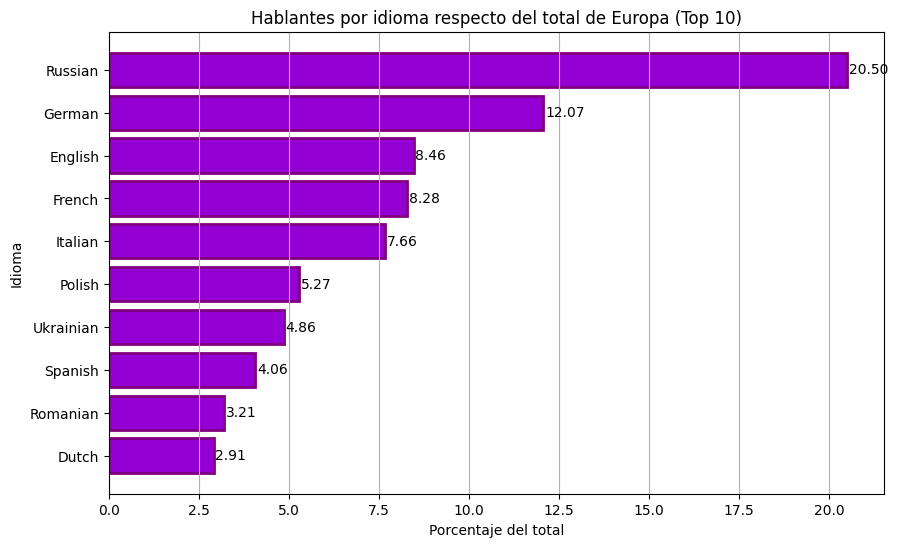

In [ ]:
plt.figure(figsize=(10, 6))
barras = plt.barh(Poblacion_Por_Idioma_Europa['Idioma'], Poblacion_Por_Idioma_Europa['Hablantes_Por_Idioma_%'], color='darkviolet', edgecolor="purple", linewidth=2)
plt.title('Hablantes por idioma respecto del total de Europa (Top 10)')
plt.xlabel('Porcentaje del total')
plt.ylabel('Idioma')

# generamos las etiquetas en las barras con un bucle
for b in barras:
    xval = b.get_width()
    plt.text(xval + 0.05, b.get_y() + b.get_height()/2, f"{xval:.2f}", ha='left', va='center')

plt.grid(axis='x')
plt.show()

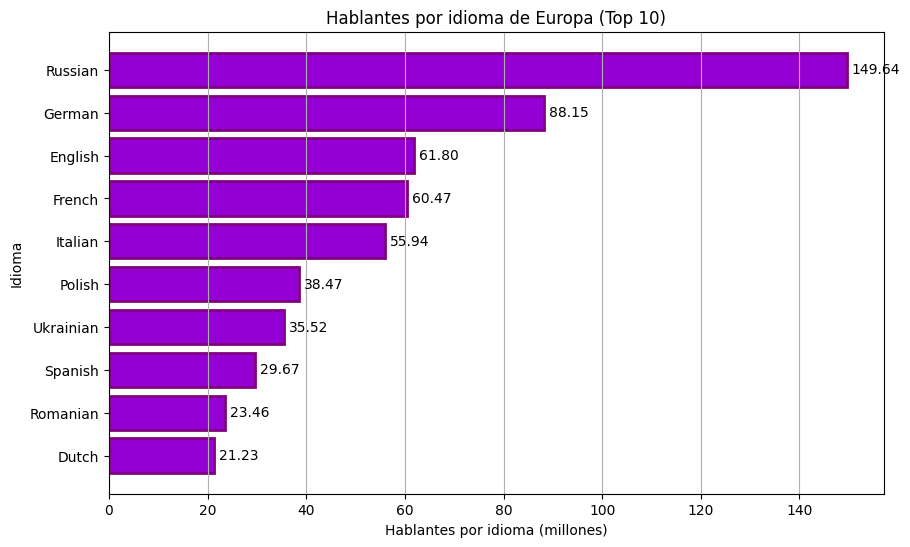

In [ ]:
plt.figure(figsize=(10, 6))
barras = plt.barh(Poblacion_Por_Idioma_Europa['Idioma'], Poblacion_Por_Idioma_Europa['Hablantes_Por_Idioma_millones'], color='darkviolet', edgecolor="purple", linewidth=2)
plt.title('Hablantes por idioma de Europa (Top 10)')
plt.xlabel('Hablantes por idioma (millones)')
plt.ylabel('Idioma')

# generamos las etiquetas en las barras con un bucle
for b in barras:
    xval = b.get_width()
    plt.text(xval + 1, b.get_y() + b.get_height()/2, f"{xval:.2f}", ha='left', va='center')

plt.grid(axis='x')
plt.show()